SINGAYE NADEGE

# **TP Noté : Web Scraping, Prétraitement et Analyse sur des Données de PubMed (Durée :1h30)**

Objectifs de ce TP :

L’objectif de ce TP est d’extraire les informations liées à des articles de PubMed, de
sauvegarder cette extraction dans un dataset, puis de les prétraiter et analyser. Le TP
est à réaliser sur un notebook où vous commenterez votre code. Le rendu se fera sur
GitHub.


**Web Scraping**

Recherchez des articles scientifiques sur PubMed en utilisant un mot-clé spécifique et
extrayez les informations suivantes :
* Titre de l’article.
* Résumé (abstract).
* Auteurs.

Adaptez votre script pour itérer sur plusieurs pages afin de récupérer davantage
d’articles. Stockez ensuite ces informations dans un dataframe.

Mon mot clé : COVID-19

In [3]:
import requests # requests est une bibliothèque HTTP
#import json #  échange de données facile à lire et à écrire pour les humains, et facile à analyser et à générer pour les machines

# attribution d'un URL
url1 = "https://pubmed.ncbi.nlm.nih.gov/33400058/"

# faire une demande
response1 = requests.get(url1)


In [6]:
from bs4 import BeautifulSoup

html1 = response1.content # contenu HTML de la page web demandée

soup1 = BeautifulSoup(html1, 'html.parser')

In [7]:
soup1

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/b4540a7b-d925-4747-955d-e13551e0ee58/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/b4540a7b-d925-4747-955d-e13551e0ee58/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/b4540a7b-d925-4747-955d-e13551e0ee58/CACHE/css/output.7bf600913

In [8]:
soup1.title.get_text() # le titre de l'article avec le texte uniquement

'Recent Developments on Therapeutic and Diagnostic Approaches for COVID-19 - PubMed'

In [9]:
soup1.find('meta', {'name': 'description'})['content'] # l'abstract de l'article dans <meta content=..

'The ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has made a serious public health threat worldwide with millions of people at risk in a growing number of countries. Though there are no clinically approved antiviral …'

In [17]:
soup1.find('meta', {'name': 'citation_authors'})['content'] # les auteurs de l'article 

'Majumder J;Minko T;'

In [ ]:
# Création d'une fonction pour itérer sur plusieurs pages afin de récupérer davantage d’articles
import requests 
from bs4 import BeautifulSoup

urls=[https://pubmed.ncbi.nlm.nih.gov/33400058/;https://pubmed.ncbi.nlm.nih.gov/33126180/;https://pubmed.ncbi.nlm.nih.gov/33664170/]

def description_article(urls): 
    for url in urls:
        response = requests.get(url)
        html = response.content # contenu HTML de la page web demandée
        soup = BeautifulSoup(html, 'html.parser')
        title = soup.title.get_text() # le titre de l'article avec le texte uniquement
        abstract = soup.find('meta', {'name': 'description'})['content'] # l'abstract de l'article dans <meta content=..
        authors = soup.find('meta', {'name': 'citation_authors'}) # les auteurs de l'article 


        return title,abstract,authors 
    
description_article(urls)

In [23]:
# Création d'une fonction pour itérer sur plusieurs pages afin de récupérer davantage d’articles
import requests 
from bs4 import BeautifulSoup

# URLs des articles
urls = [
    "https://pubmed.ncbi.nlm.nih.gov/33400058/",
    "https://pubmed.ncbi.nlm.nih.gov/33126180/",
    "https://pubmed.ncbi.nlm.nih.gov/33664170/",
    "https://pubmed.ncbi.nlm.nih.gov/32749914/",
    "https://pubmed.ncbi.nlm.nih.gov/33980687/",
    "https://pubmed.ncbi.nlm.nih.gov/35619009/"
]

def description_article(urls): 
    articles_info = []  # Liste pour stocker les informations des articles
    for url in urls:
        response = requests.get(url)
        html = response.content  # contenu HTML de la page web demandée
        soup = BeautifulSoup(html, 'html.parser')
        
        # titre de l'article
        title = soup.title.get_text()
        
        # abstract de l'article
        abstract = soup.find('meta', {'name': 'description'})['content']
        
        # auteurs de l'article
        authors = soup.find('meta', {'name': 'citation_authors'})['content']
        
        # ajout des infos extraites dans la liste articles_info
        articles_info.append({
            'Title': title,
            'Abstract': abstract,
            'Authors': authors,
            'URL': url
        })
    
    return articles_info  # Retourner la liste de tous les articles



In [24]:
# appel de la fonction 
articles = description_article(urls)

In [25]:
# affichage des informations pour chaque article
for article in articles:
    print(f"Title: {article['Title']}")
    print(f"Abstract: {article['Abstract']}")
    print(f"Authors: {article['Authors']}")
    print(f"URL: {article['URL']}")

Title: Recent Developments on Therapeutic and Diagnostic Approaches for COVID-19 - PubMed
Abstract: The ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has made a serious public health threat worldwide with millions of people at risk in a growing number of countries. Though there are no clinically approved antiviral …
Authors: Majumder J;Minko T;
URL: https://pubmed.ncbi.nlm.nih.gov/33400058/
Title: COVID-19 diagnosis -A review of current methods - PubMed
Abstract: A fast and accurate self-testing tool for COVID-19 diagnosis has become a prerequisite to comprehend the exact number of cases worldwide and to take medical and governmental actions accordingly. SARS-CoV-2 (formerly, 2019-nCoV) infection was first reported in Wuhan (China) in December 2019, and then …
Authors: Yüce M;Filiztekin E;Özkaya KG;
URL: https://pubmed.ncbi.nlm.nih.gov/33126180/
Title: COVID-19 pandemic: from origins to outcomes. A com

In [26]:
# Sauvegarde dans un Dataframe
import pandas as pd # permet la création de dataframe

df = pd.DataFrame(articles) 


In [27]:
df # affichage de df contenant tous les infos des articles 

,Title,Abstract,Authors,URL
0,Recent Developments on Therapeutic and Diagnos...,The ongoing pandemic of coronavirus disease 20...,Majumder J;Minko T;,https://pubmed.ncbi.nlm.nih.gov/33400058/
1,COVID-19 diagnosis -A review of current method...,A fast and accurate self-testing tool for COVI...,Yüce M;Filiztekin E;Özkaya KG;,https://pubmed.ncbi.nlm.nih.gov/33126180/
2,COVID-19 pandemic: from origins to outcomes. A...,Severe Acute Respiratory Syndrome Coronavirus-...,Ochani R;Asad A;Yasmin F;Shaikh S;Khalid H;Bat...,https://pubmed.ncbi.nlm.nih.gov/33664170/
3,Resolution of coronavirus disease 2019 (COVID-...,The exit strategy for a path back to normal li...,Habas K;Nganwuchu C;Shahzad F;Gopalan R;Haque ...,https://pubmed.ncbi.nlm.nih.gov/32749914/
4,Tools and Techniques for Severe Acute Respirat...,The coronavirus disease 2019 (COVID-19) pandem...,Safiabadi Tali SH;LeBlanc JJ;Sadiq Z;Oyewunmi ...,https://pubmed.ncbi.nlm.nih.gov/33980687/
5,COVID-19 diagnostic methods in developing coun...,COVID-19 has become one of the few leading cau...,Maniruzzaman M;Islam MM;Ali MH;Mukerjee N;Mait...,https://pubmed.ncbi.nlm.nih.gov/35619009/


**Analyse Exploratoire et Prétraitement**

Une fois les informations dans un dataframe, réalisez les tâches suivantes :
* Appliquez une pipeline de prétraitement (comme vu dans les TD) sur les résumés et les titres des articles. Les pipelines peuvent être différentes pour les deux champs.

Après avoir appliqué ces pipelines :
* Créez un nuage de mots à partir des résumés.
* Calculez la fréquence des mots présents dans les résumés et réalisez une visualisation pour représenter cette distribution.

In [28]:
df['Title'] # afficher uniquement la colonne 'Title' de df 

0    Recent Developments on Therapeutic and Diagnos...
1    COVID-19 diagnosis -A review of current method...
2    COVID-19 pandemic: from origins to outcomes. A...
3    Resolution of coronavirus disease 2019 (COVID-...
4    Tools and Techniques for Severe Acute Respirat...
5    COVID-19 diagnostic methods in developing coun...
Name: Title, dtype: object

In [29]:
# TRAITEMENT DU TITRE 
import re # regex pour travailler des expressions régulières :

# fonction de prétraitement pour le titre
def title_treatment(title):
    title = title.lower() # conversion en minuscule 
    title = re.sub(r'[^a-z\s]', '', title) # supprimer toutes ponctuations 
    return title

# fonction de prétraitement sur la colonne 'Title'
df['Processed Title'] = df['Title'].apply(title_treatment)

# affichage du DataFrame avec la colonne 'Processed Title'
print(df[['Title', 'Processed Title']])

                                               Title  \
0  Recent Developments on Therapeutic and Diagnos...   
1  COVID-19 diagnosis -A review of current method...   
2  COVID-19 pandemic: from origins to outcomes. A...   
3  Resolution of coronavirus disease 2019 (COVID-...   
4  Tools and Techniques for Severe Acute Respirat...   
5  COVID-19 diagnostic methods in developing coun...   

                                     Processed Title  
0  recent developments on therapeutic and diagnos...  
1  covid diagnosis a review of current methods  p...  
2  covid pandemic from origins to outcomes a comp...  
3   resolution of coronavirus disease  covid  pubmed  
4  tools and techniques for severe acute respirat...  
5  covid diagnostic methods in developing countri...  


In [33]:
df['Abstract'] # afficher uniquement la colonne 'Abstract' de df 

0    The ongoing pandemic of coronavirus disease 20...
1    A fast and accurate self-testing tool for COVI...
2    Severe Acute Respiratory Syndrome Coronavirus-...
3    The exit strategy for a path back to normal li...
4    The coronavirus disease 2019 (COVID-19) pandem...
5    COVID-19 has become one of the few leading cau...
Name: Abstract, dtype: object

In [52]:
# TRAITEMENT DE L'ABSTRACT 

# téléchargement de stopwords 
import nltk # biblio "Natural Language Toolkit" sert à tokeniser, analyser, et effectuer des tâches NLP
nltk.download('stopwords')  # télécharge les stopwords dans la bibliothéque ntlk
nltk.download('punkt')  # télécharge le modèle 'punkt' pour la tokenisation

# importation de ntlk.corpus
from nltk.corpus import stopwords # ntlk.corpus est un linguistiques prêts à l'emploi
stop_words = set(stopwords.words('english')) # en anglais 

# importation de ntlk.tokenize 
from nltk.tokenize import word_tokenize # méthode qui permet de diviser un texte en token

# importation de ntlk.stem pour la lemmatisation 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer # méthode pour pour réduire un mot à une forme "radicale"

# téléchargement de stopwords 
import nltk # biblio "Natural Language Toolkit" sert à tokeniser, analyser, et effectuer des tâches NLP


# fonction de prétraitement pour l'abstract pour nettoyer la chaîne de caractére 
def abstract_treatment(abstract):
    abstract = abstract.lower() # conversion en minuscule 
    abstract = re.sub(r'[^a-z\s]', '', abstract) # supprimer toutes ponctuations 

    # token + suppression des stopwords
    stop_words = set(stopwords.words('english')) # supprimer les mots vides comme « le », « un » = pas de signification importante et généralement éloignés des textes
    words = word_tokenize(abstract)  
    words = [word for word in words if word not in stop_words]
    
    # lemmatisation qui applique des règles pour enlever les suffixes ou préfixe
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # recombinaison des mots pour former un texte propre
    abstract = ' '.join(words)

    return abstract # retourne l'abstract 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
# fonction de prétraitement sur la colonne 'Abstract'
df['Processed Abstract'] = df['Abstract'].apply(abstract_treatment)

# affichage du DataFrame avec la colonne 'Processed Abstract'
print(df[['Abstract', 'Processed Abstract']])

                                            Abstract  \
0  The ongoing pandemic of coronavirus disease 20...   
1  A fast and accurate self-testing tool for COVI...   
2  Severe Acute Respiratory Syndrome Coronavirus-...   
3  The exit strategy for a path back to normal li...   
4  The coronavirus disease 2019 (COVID-19) pandem...   
5  COVID-19 has become one of the few leading cau...   

                                  Processed Abstract  
0  ongoing pandemic coronavirus disease covid cau...  
1  fast accurate selftesting tool covid diagnosis...  
2  severe acute respiratory syndrome coronavirus ...  
3  exit strategy path back normal life required i...  
4  coronavirus disease covid pandemic caused seve...  
5  covid become one leading cause death evolved p...  


In [42]:
# meilleur affichage avec la ligne 3 de df sur la colonne "Abstract"
print(df.loc[3,'Abstract'])
print(df.loc[3,'Processed Abstract'])

The exit strategy for a path back to normal life is required, which should involve a multi-prong effort toward development of new treatment and a successful vaccine to protect public health worldwide and prevent future COVID-19 outbreaks. Therefore, the bench to bedside translational research as wel …
exit strategy path back normal life required involve multiprong effort toward development new treatment successful vaccine protect public health worldwide prevent future covid outbreak therefore bench bedside translational research wel


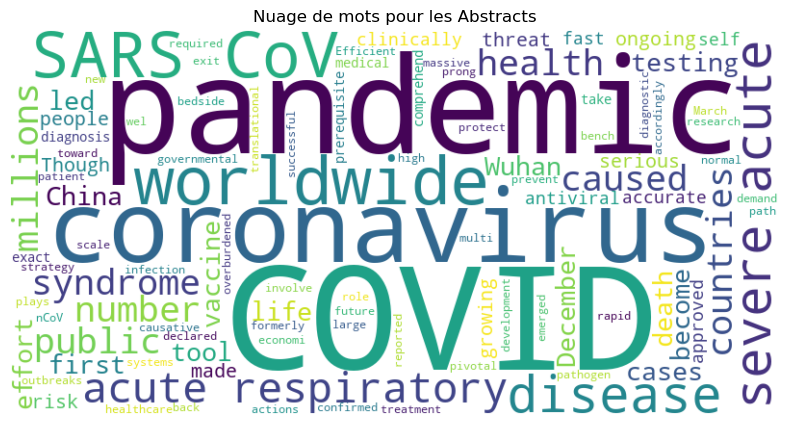

In [45]:
# NUAGE DE POINTS pour la colonne 'Abstract'

import wordcloud # crée des nuages de mots à partir de textes
import matplotlib.pyplot as plt # visualisation des données
 
# combiner tous les textes des abstracts en une seule chaîne de caractére 
abstract_text = ' '.join(df['Abstract'])

# créer un nuage de mots avec la liste de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    min_font_size=5,
    max_font_size=150,
    background_color="white",
).generate(abstract_text)

# afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # désactiver les axes
plt.title("Nuage de mots pour les Abstracts")
plt.show()

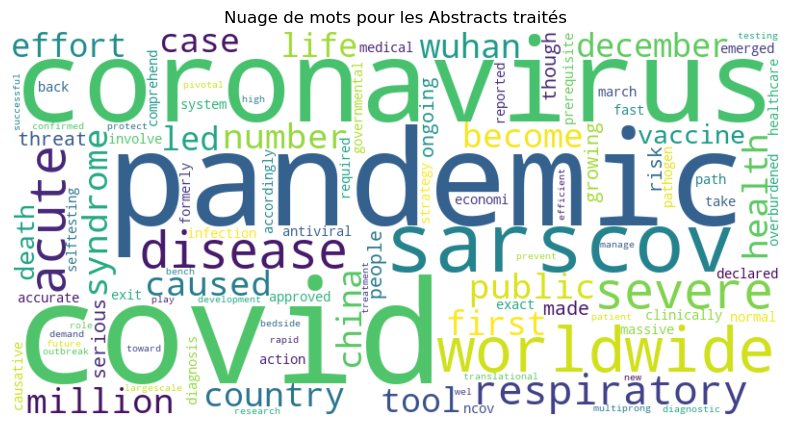

In [46]:
# NUAGE DE POINTS pour la colonne 'Abstract' traités 

import wordcloud # crée des nuages de mots à partir de textes
import matplotlib.pyplot as plt # visualisation des données
 
# combiner tous les textes des abstracts en une seule chaîne de caractére 
abstract_text = ' '.join(df['Processed Abstract'])

# créer un nuage de mots avec la liste de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    min_font_size=5,
    max_font_size=150,
    background_color="white",
).generate(abstract_text)

# afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # désactiver les axes
plt.title("Nuage de mots pour les Abstracts traités")
plt.show()

In [67]:
# Pour récuperer les tokens 

# téléchargement de stopwords 
import nltk # biblio "Natural Language Toolkit" sert à tokeniser, analyser, et effectuer des tâches NLP
nltk.download('stopwords')  # télécharge les stopwords dans la bibliothéque ntlk
nltk.download('punkt')  # télécharge le modèle 'punkt' pour la tokenisation

# importation de ntlk.corpus
from nltk.corpus import stopwords # ntlk.corpus est un linguistiques prêts à l'emploi
stop_words = set(stopwords.words('english')) # en anglais 

# importation de ntlk.tokenize 
from nltk.tokenize import word_tokenize # méthode qui permet de diviser un texte en token

# importation de ntlk.stem pour la lemmatisation 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer # méthode pour pour réduire un mot à une forme "radicale"

# téléchargement de stopwords 
import nltk # biblio "Natural Language Toolkit" sert à tokeniser, analyser, et effectuer des tâches NLP


# fonction de prétraitement pour l'abstract pour nettoyer la chaîne de caractére 
def abstract_treatment_token(abstract):
    abstract = abstract.lower() # conversion en minuscule 
    abstract = re.sub(r'[^a-z\s]', '', abstract) # supprimer toutes ponctuations 

    # token + suppression des stopwords
    stop_words = set(stopwords.words('english')) # supprimer les mots vides comme « le », « un » = pas de signification importante et généralement éloignés des textes
    words = word_tokenize(abstract)  
    words = [word for word in words if word not in stop_words]

    
    # lemmatisation qui applique des règles pour enlever les suffixes ou préfixe
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # recombinaison des mots pour former un texte propre
    abstract = ' '.join(words)

    return words # retourne les tokens 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
# fonction de prétraitement sur la colonne 'Abstract' pour récuperer les tokens 
df['Tokens'] = df['Abstract'].apply(abstract_treatment_token)

# combiner tous les tokens en une seule liste pour le calcul de fréquence
all_tokens = [token for tokens in df['Tokens'] for token in tokens]

In [73]:
# METHODE POUR AVOIR LA FREQUENCE DES TOKENS 
from collections import defaultdict # spécifie une valeur par défaut pour les clés inexistantes pour éviter des erreurs

# afficher la liste originale 
print("The original list is : " + str(all_tokens))
 
temp = defaultdict(int) # dictionnaire temp : si une clé n'existe pas alors elle sera automatiquement initialisée à 0 
 
# comptage des mots dans la liste
for wrd in all_tokens:
    temp[wrd] += 1  # On incrémente la fréquence de chaque mot
 
# obtention de la freq max des mots 
res = max(temp, key=temp.get)
 
# voilà les occurrences de chaque mot
print("\nLes occurrences de chaque mot :")
for word, count in temp.items():
    print(f"{word}: {count}")

The original list is : ['ongoing', 'pandemic', 'coronavirus', 'disease', 'covid', 'caused', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', 'sarscov', 'made', 'serious', 'public', 'health', 'threat', 'worldwide', 'million', 'people', 'risk', 'growing', 'number', 'country', 'though', 'clinically', 'approved', 'antiviral', 'fast', 'accurate', 'selftesting', 'tool', 'covid', 'diagnosis', 'become', 'prerequisite', 'comprehend', 'exact', 'number', 'case', 'worldwide', 'take', 'medical', 'governmental', 'action', 'accordingly', 'sarscov', 'formerly', 'ncov', 'infection', 'first', 'reported', 'wuhan', 'china', 'december', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', 'sarscov', 'causative', 'pathogen', 'covid', 'first', 'emerged', 'wuhan', 'china', 'december', 'march', 'declared', 'pandemic', 'covid', 'pandemic', 'overburdened', 'healthcare', 'system', 'country', 'led', 'massive', 'economi', 'exit', 'strategy', 'path', 'back', 'normal', 'life', 'required', 'involve

In [70]:
# fmax
max_freq_word = max(temp, key=temp.get)
print(f"Le mot avec la fréquence maximale est '{max_freq_word}' avec {temp[max_freq_word]} occurrences.")

# Mot le moins fréquent
min_freq_word = min(temp, key=temp.get)
print(f"Le mot le moins fréquent est '{min_freq_word}' avec {temp[min_freq_word]} occurrence.")

Le mot avec la fréquence maximale est 'covid' avec 7 occurrences.
Le mot le moins fréquent est 'ongoing' avec 1 occurrence.


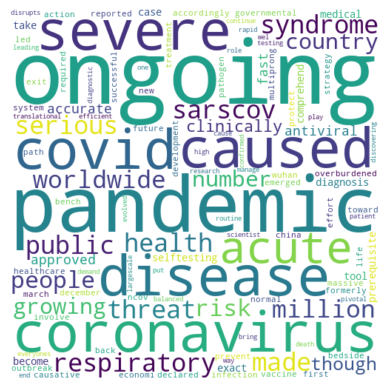

In [71]:
import pandas as pd
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# créer un nuage de mots avec la liste de mots
wordcloud = WordCloud(width=500,
                      height=500,
                      max_words=1000,
                      min_font_size=5,
                      max_font_size=200,
                      background_color="white").generate(' '.join(temp))

# afficher le nuage de mots
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Désactiver les axes
plt.show()